[View in Colaboratory](https://colab.research.google.com/github/wo1ever/TIL/blob/master/%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90%EB%B6%84%EB%A5%98%EC%A0%9C%EC%95%88_%EC%95%88%EC%84%B8%EC%98%81.ipynb)

## 국민청원분류제안 과제

당신은 청와대국민청원 사이트 개발팀에서 일하는 데이터 분석가입니다.

개발팀에서는 이번에 국민청원 카테고리를 개편하려고 합니다. 


기존 카테고리 중

**1) 그대로 유지할 카테고리, **

**2) 없애거나 다른 카테고리와 합치면 좋을만한 카테고리, **

**3) 원래 하나였으나 더 세분화하여 나눌 두 개 혹은 세 개로 나눌 카테고리가 있는지**

에 대하여 의사결정을 하고자 합니다. 


기존 청원 데이터에 기반한, 합리적이고 설득력있는 개선안을 제안해주시기 바랍니다.

실제 상황이라고 생각하고 작업해주세요.

데이터 분석을 잘 모르는 개발팀 사람들이 이해할 수 있으면 좋습니다.


## 진행 순서
1. 카테고리 현황 확인

  1.1. 현재의 카테고리를 알아봅니다.
  
  1.2. 청원수가 많은 카테고리를 확인해 봅니다.
  
  1.3. 투표수가 많은 카테고리를 확인해 봅니다.

2. 주제 별 청원내용 확인

  2.1. 카테고리 별 주요 내용들을 확인해 봅니다.

3. 분류의 타당성 확인

  3.1. 각 카테고리와 내용이 얼마나 연관성이 있는 지 확인해 봅니다.
  
  3.2. 동일 카테고리 내 청원내용들 사이의 연관성을 확인해 봅니다.


## 1. 카테고리 현황 확인

### 1.1. 현재의 카테고리를 알아봅니다.

먼저 대략적인 전체 데이터를 확인해 보겠습니다.

In [131]:
# 필요한 패키지 및 글꼴 등을 설치
# !pip install request
# !pip install html5lib beautifulsoup4
# !pip install soynlp
# !pip install -U scikit-learn
# !pip install wordcloud
# 나눔글꼴 설치
# !apt install fonts-nanum

# Plotnine 패키지 설치
# !pip install plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 레티나 디스플레이 지원
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import re
import html5lib
from plotnine import *

from random import *
from bs4 import BeautifulSoup

from soynlp.noun import LRNounExtractor

    100% |████████████████████████████████| 368kB 7.2MB/s 


In [0]:
# 애란쌤께서 만들어 두신 국민청원 csv파일 가져오기
src = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv')

In [0]:
# 매 번 새롭게 데이터를 불러오는 것을 방지하기 위해 미리 복사해두고 사용하기
df = src.copy()
df = df.dropna()

국민청원 데이터를 불러왔습니다.

이제 불러 온 데이터의 일부를 출력하여 확인해 보겠습니다.

In [9]:
df.head(2)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...


전체 청원 데이터는 **청원번호**(article_id), **시작일**(start)/**마감일**(end), **답변수**(answered), **투표수**(votes), **청원분류**(category), **청원제목**(title), **청원내용**(content) 으로 구성되어 있음을 확인하였습니다.

그 중 우리가 관심있는 부분은 '**청원분류**'(category) 부분의 개편입니다.

현재 청원분류가 몇 개로 나누어져 있는 지 확인해 보겠습니다.

In [12]:
df['category'].unique()

array(['안전/환경', '기타', '미래', '일자리', '보건복지', '정치개혁', '경제민주화', '인권/성평등',
       '외교/통일/국방', '육아/교육', '문화/예술/체육/언론', '반려동물', '교통/건축/국토', '행정',
       '농산어촌', '저출산/고령화대책', '성장동력'], dtype=object)

카테고리는 총 17개로 되어 있음을 확인했습니다.

### 1.2. 청원수가 많은 카테고리를 확인해 봅니다.

그 다음으로는 각 카테고리 별 청원의 개수를 확인해 보겠습니다.

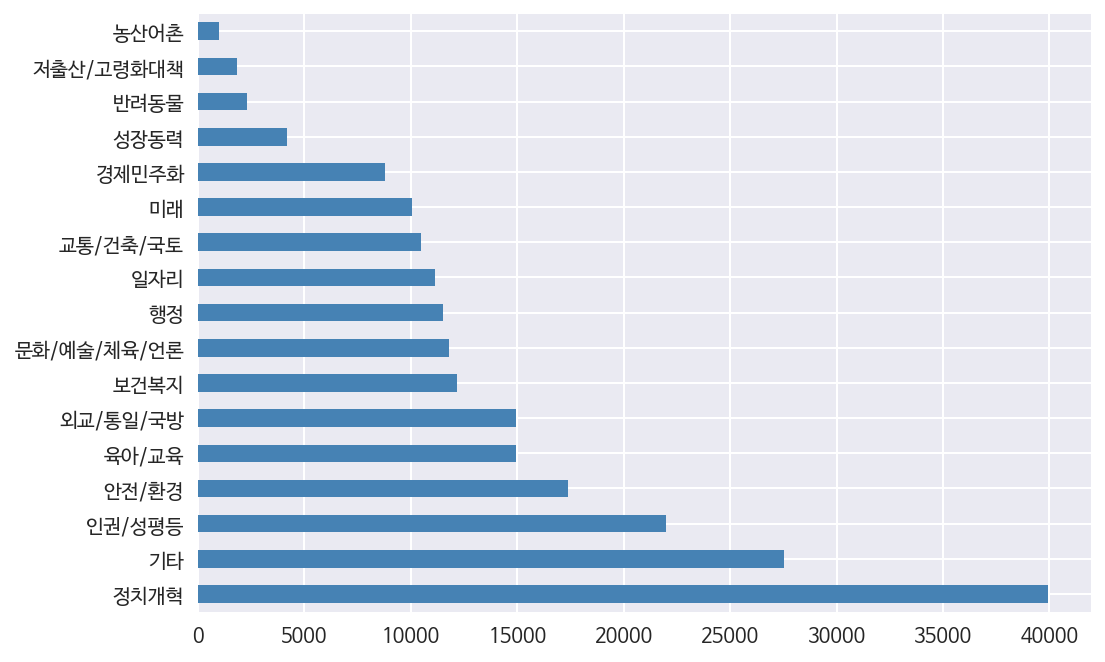

In [16]:
sorted_category = df['category'].sort_values().value_counts()

sorted_category.plot.barh(color='steelblue')

In [61]:
for i in range(1,18):
  print(i,"위 :",sorted_category.index[i-1], sorted_category[i-1],"건")

1 위 : 정치개혁 39949 건
2 위 : 기타 27544 건
3 위 : 인권/성평등 22006 건
4 위 : 안전/환경 17403 건
5 위 : 육아/교육 14953 건
6 위 : 외교/통일/국방 14947 건
7 위 : 보건복지 12189 건
8 위 : 문화/예술/체육/언론 11787 건
9 위 : 행정 11514 건
10 위 : 일자리 11136 건
11 위 : 교통/건축/국토 10492 건
12 위 : 미래 10038 건
13 위 : 경제민주화 8768 건
14 위 : 성장동력 4171 건
15 위 : 반려동물 2302 건
16 위 : 저출산/고령화대책 1821 건
17 위 : 농산어촌 962 건


**정치개혁** 분야의 청원이 약 4만건으로 가장 많았고, 

2위 '**기타**' 그 다음으로는 '**인권/성평등**', '**안전/환경**' 순으로 나타났습니다.


여기에서 다른 분류들과는 달리 특별한 주제가 아니지만 두 번째로 많은 청원 카테고리로 나타난
 '**기타**' 카테고리에 대해 더 알아봐야 할 필요가 있습니다.

'기타'카테고리의 내용과 관련하여 적절한 개선이 이루어질 수 있을 것이라고 예상됩니다.


### 1.3. 투표수가 많은 카테고리를 확인해 봅니다.

청원의 수와 함께 관심도를 나타내는 지표로 '투표수'를 살펴 보겠습니다.

가장 많은 투표를 받은 청원의 상위 20개의 카테고리를 확인해 봅니다.

In [98]:
sorted_votes = df[['category','votes']].sort_values(by='votes', ascending=False)
sorted_votes.head(20)

,category,votes
208597,외교/통일/국방,714875
10894,미래,615354
118970,문화/예술/체육/언론,614127
183791,인권/성평등,419006
91882,외교/통일/국방,360905
218365,기타,354935
175768,기타,334173
138242,정치개혁,304320
187991,외교/통일/국방,302635
164274,행정,302082


여전히 '기타' 카테고리가 상위권에 나타나며 중요한 청원내용이 있음을 확인할 수 있습니다.

## 2. 주제 별 청원내용 확인

### 2.1. 카테고리 별 주요 내용들을 확인해 봅니다.

먼저 '기타'분류에는 주로 어떤 내용의 청원이 있는지 알아보겠습니다.

알아보기에 앞서, 허위 청원을 골라내기 위하여 투표 수가 100건 이상인 청원만을 뽑았습니다.

In [0]:
votes_over500 = df.loc[df['votes'] > 100]

In [138]:
others = votes_over500.loc[votes_over500['category']=='기타'] \
.sort_values(by='votes', ascending=False)
others.head(2)

,article_id,start,end,answered,votes,category,title,content
218365,282903,2018-06-24,2018-07-24,0,354935,기타,"가해자들은 떳떳이 생활하고, 집단 성폭행 당한 피해자인 저희아이는 오히려 더 죄인같...",저는 15살 여중생을 둔 엄마입니다.\n2018년 3월 저희 아이는 2000년생 남...
175768,219348,2018-05-02,2018-06-01,0,334173,기타,(한번씩만 봐주세요.)저의 일은 아니지만 이런 일은 좀 강력 처벌 강력하게 조치 해...,"일단 저의 일은 아니지만 저의 가족,친구,지인이 이런일을 당하면 정말 안되겠다고 생..."


'기타'카테고리에서 투표수를 기준으로 상위 2개의 청원의 내용을 확인해 보았습니다.

다음으로는 '기타' 카테고리의 모든 내용들에 대해 시각적으로 확인해 보겠습니다.

In [139]:
# 불필요한 개행 문자를 제거하는 함수를 정의합니다.
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()

def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [0]:
# 추출된 단어들을 시각적으로 보여주기 위한 함수를 정의합니다.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# 카테고리의 제목을 넣으면 word cloud를 그려주는 함수를 새로 정의했습니다.

def draw_wordcloud(category_name):
  category_variable = votes_over500.loc[votes_over500['category']==category_name] \
    .sort_values(by='votes', ascending=False)
  
  # 해당 카테고리의 내용에 관한 단어들을 토큰화합니다.
  sentences = category_variable['content'].apply(preprocessing)
  tokens = sentences.apply(tokenizer.tokenize)

  noun_extractor = LRNounExtractor(verbose=True)
  noun_extractor.train(sentences)
  nouns = noun_extractor.extract()

  # 추출된 명사를 찍어봅니다.
  displayWordCloud(' '.join(nouns))

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (11599, 6012) tokens
building lr-graph completed

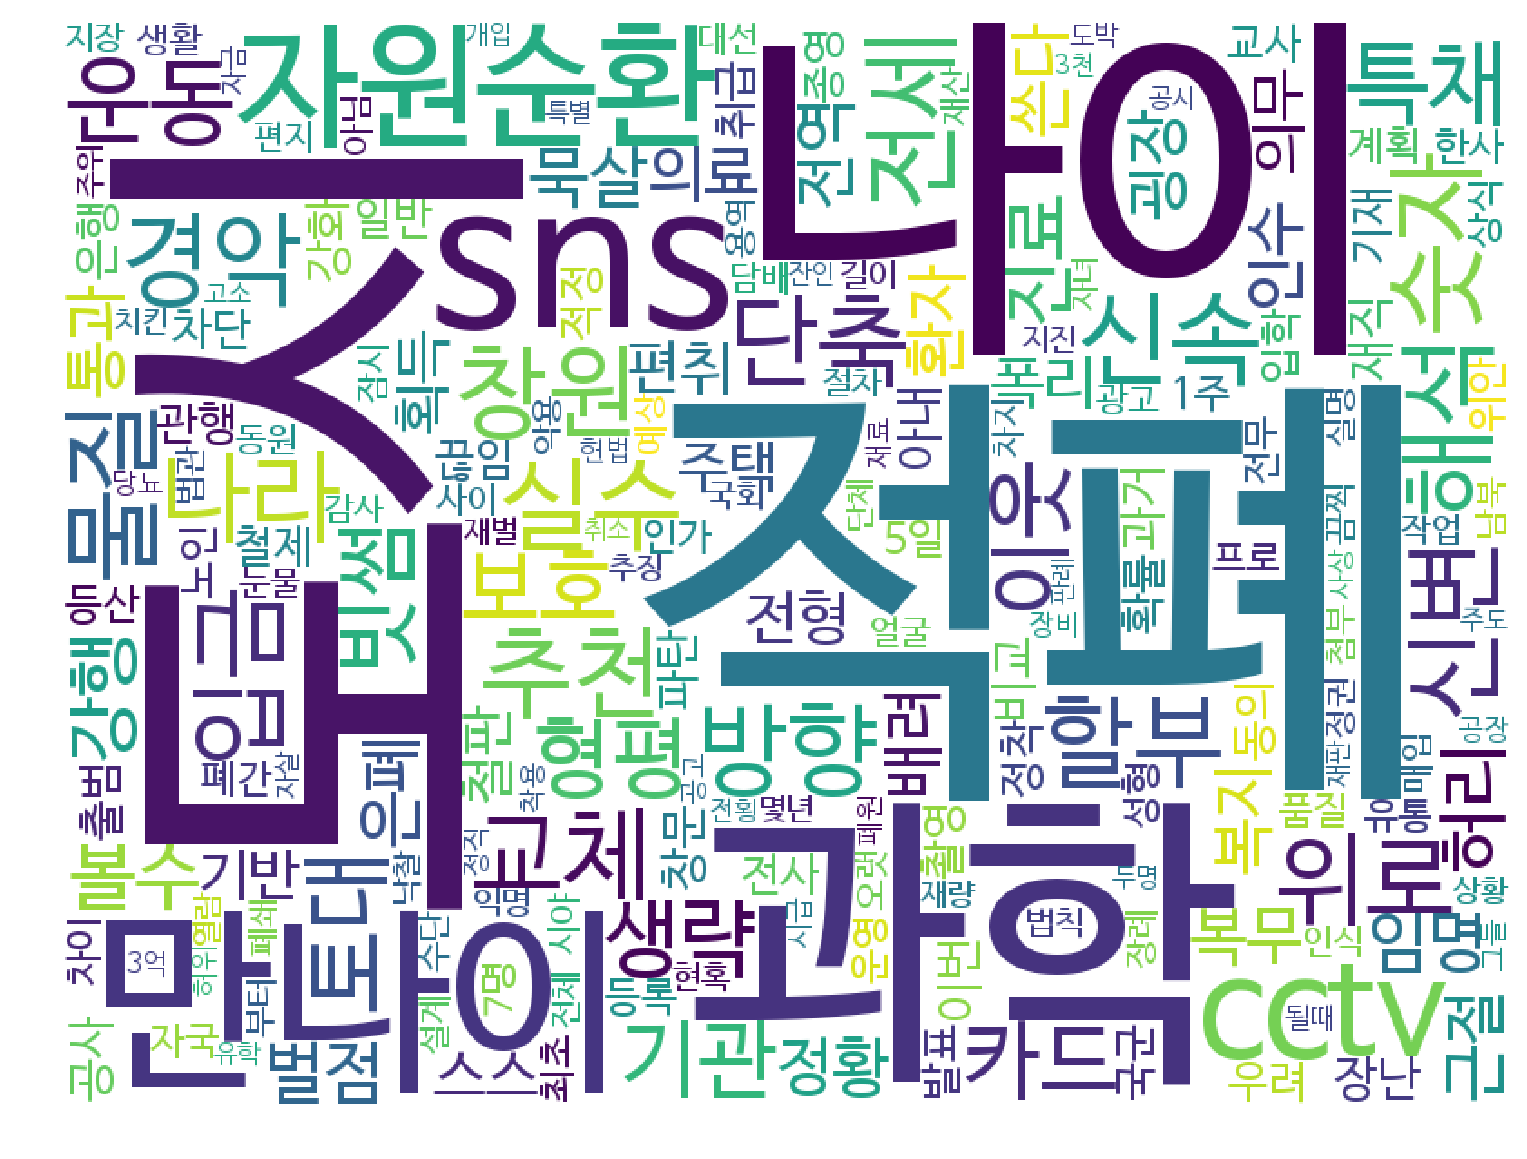

In [180]:
# 위의 함수 지정해주기 이전까지는 긴 코드를 모든 카테고리에 써 주었어야 했지만
# 함수를 지정하였기 때문에 각 카테고리의 이름만 써넣으면 함수가 실행됩니다.

# futures = votes_over500.loc[votes_over500['category']=='미래'] \
# .sort_values(by='votes', ascending=False)

# # 해당 카테고리의 내용에 관한 단어들을 토큰화합니다.
# sentences = futures['content'].apply(preprocessing)
# tokens = sentences.apply(tokenizer.tokenize)

# noun_extractor = LRNounExtractor(verbose=True)
# noun_extractor.train(sentences)
# nouns = noun_extractor.extract()

# 추출된 명사를 찍어봅니다.
# displayWordCloud(' '.join(nouns))

draw_wordcloud('기타')

주요 키워드들로 '(만)나이', '과학', 적폐, '도시', '자원순환' 등이 나옴을 확인하였습니다.

'과학'이란 단어가 자주 등장함이 눈에 띕니다.

다음으로는 '정치개혁'카테고리의 내용을 살펴보겠습니다.

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (11601, 6323) tokens
building lr-graph completed

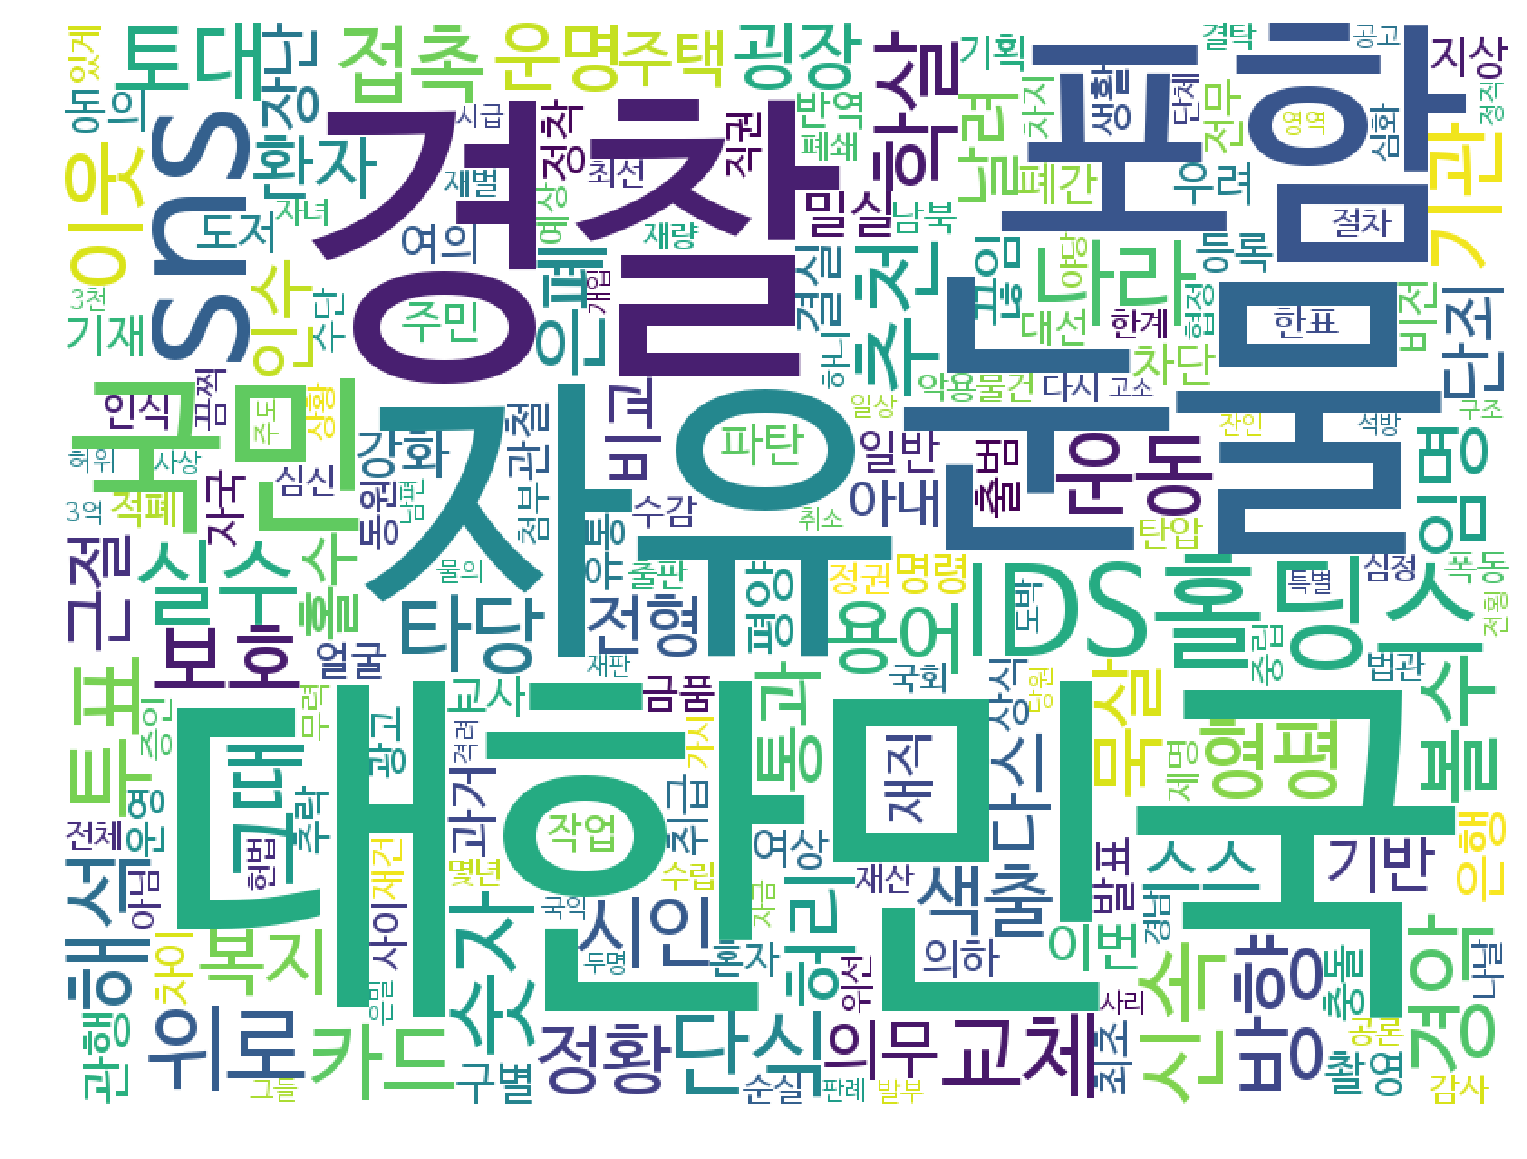

In [182]:
draw_wordcloud('정치개혁')

정치개혁 분야에서는 '경찰', '대한민국', '국민', '자유', 'SNS' 등의 단어가 주요 키워드로 나타납니다.

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (3879, 2141) tokens
building lr-graph completed

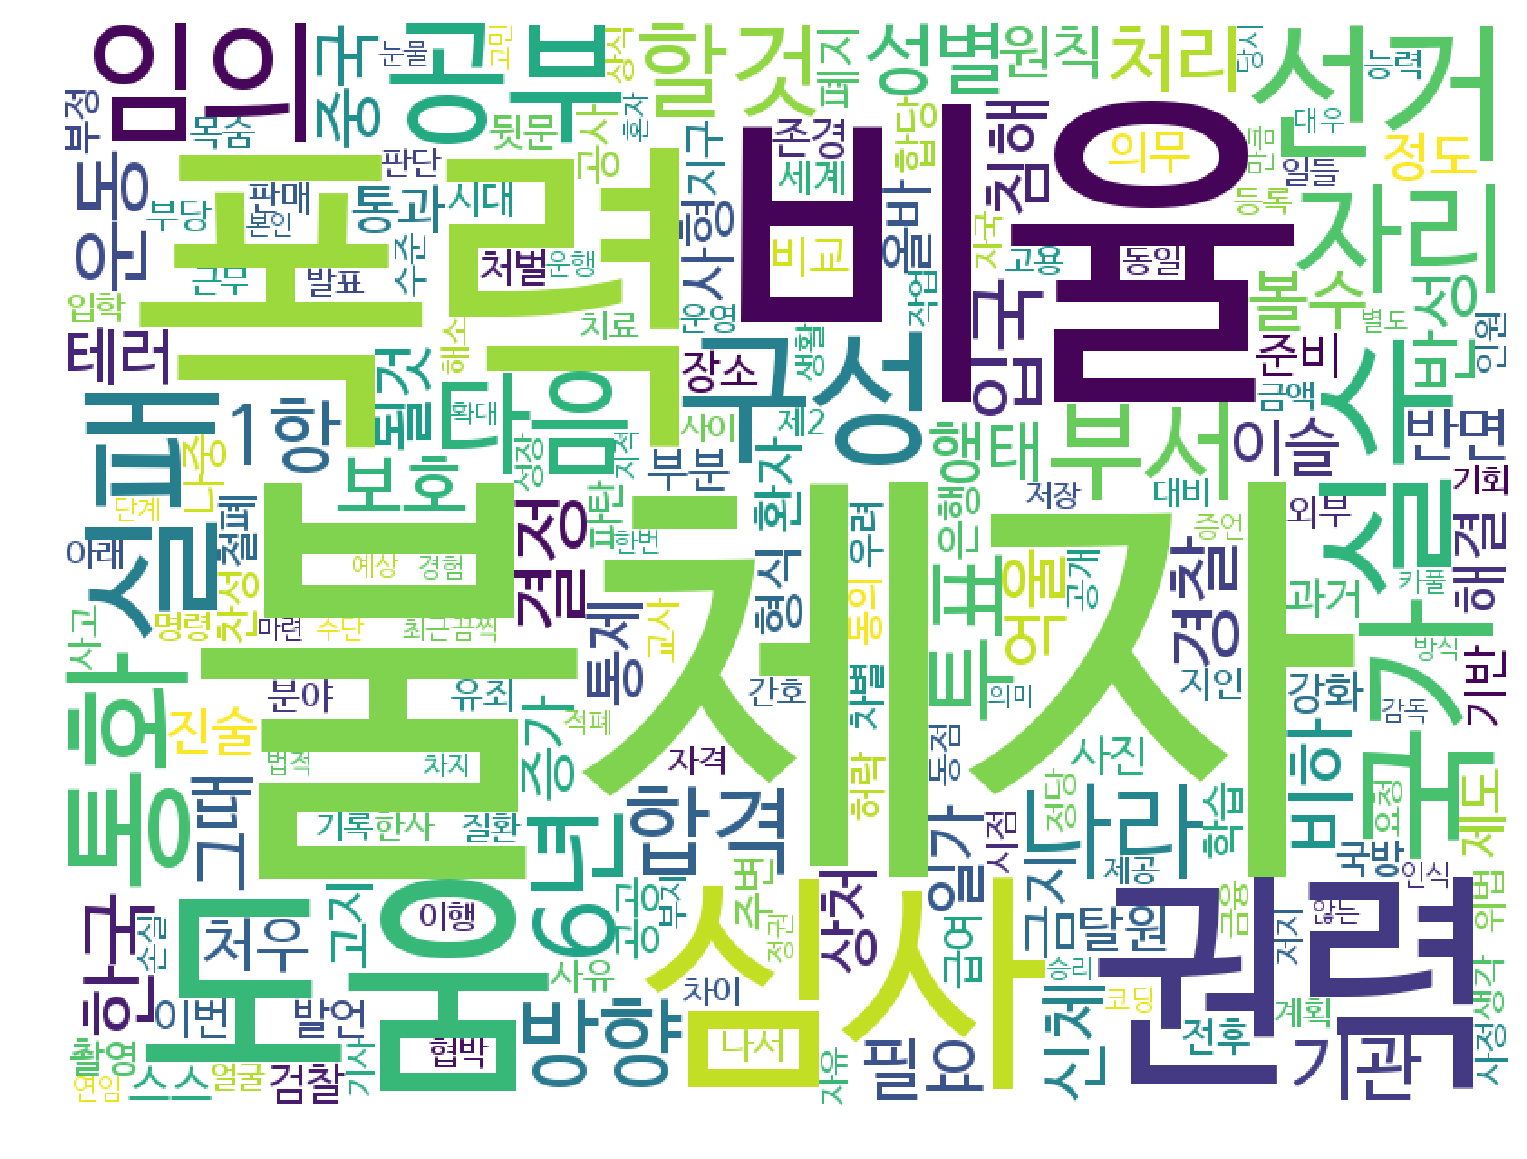

In [183]:
draw_wordcloud('미래')

'불체자', '폭력', '비율', '권력', '선거' 등의 단어가 주로 나타납니다.

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (11747, 6148) tokens
building lr-graph completed

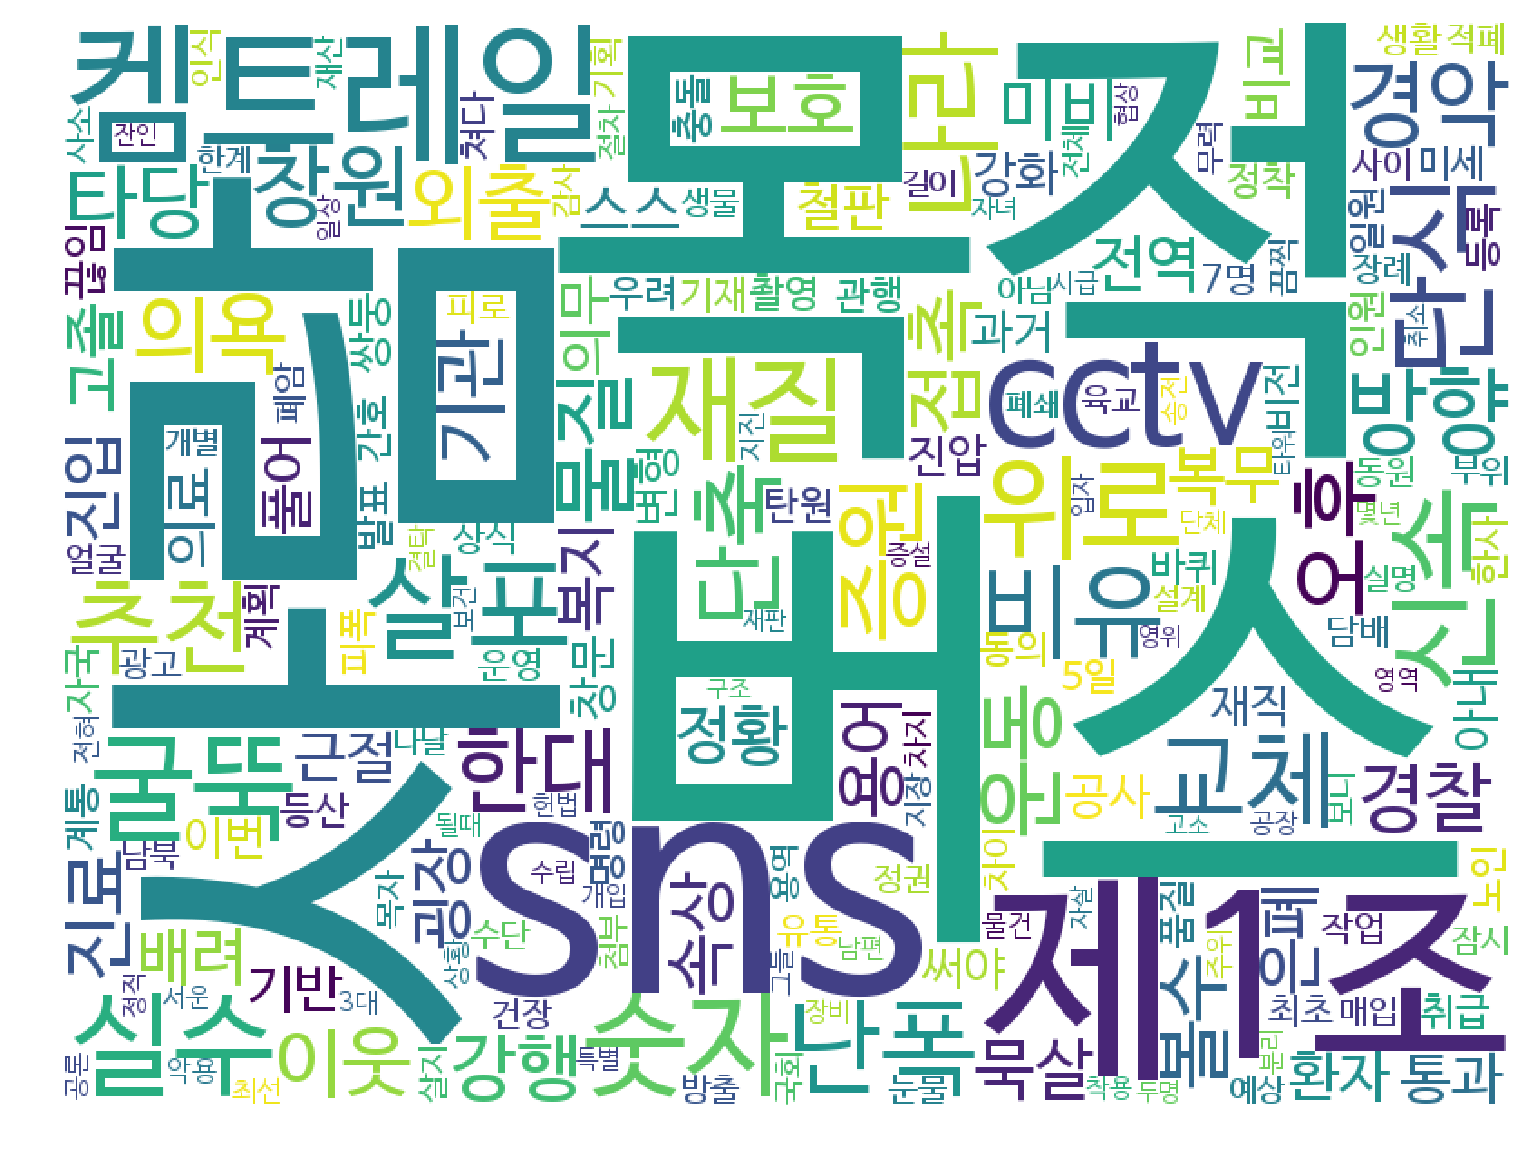

In [184]:
draw_wordcloud('안전/환경')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (8594, 4732) tokens
building lr-graph completed

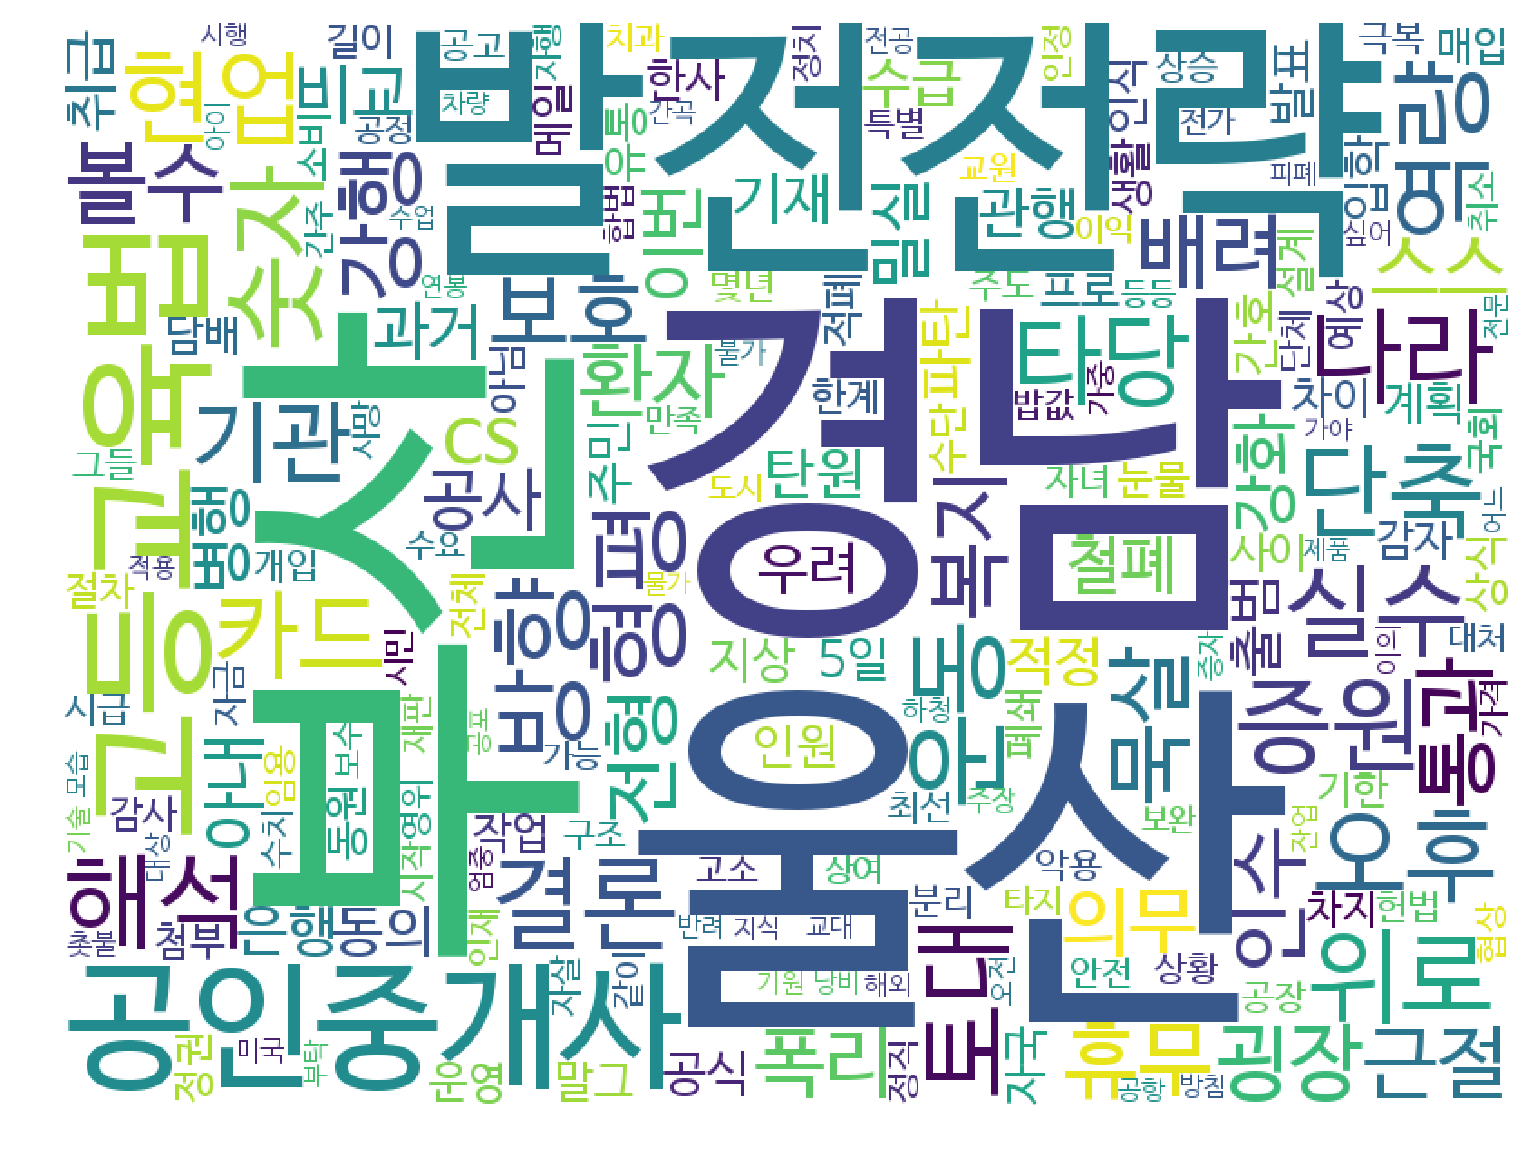

In [185]:
draw_wordcloud('일자리')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (20245, 10521) tokens
building lr-graph completed

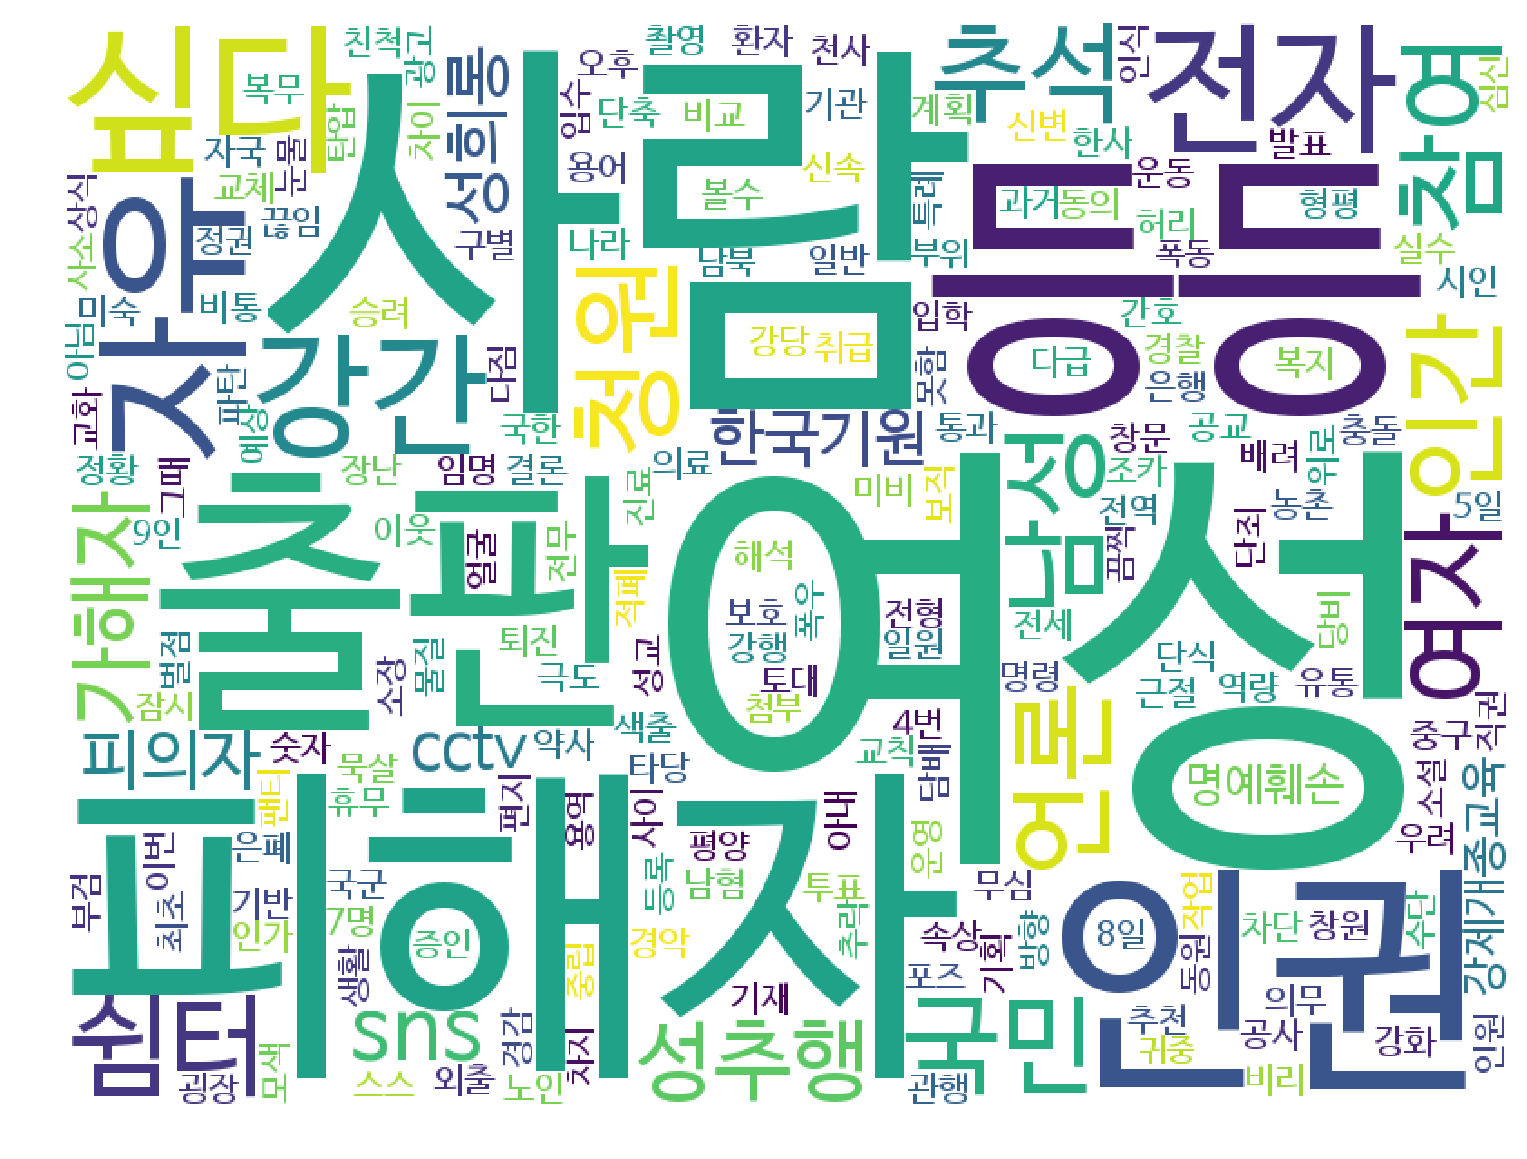

In [186]:
draw_wordcloud('인권/성평등')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (8736, 4752) tokens
building lr-graph completed

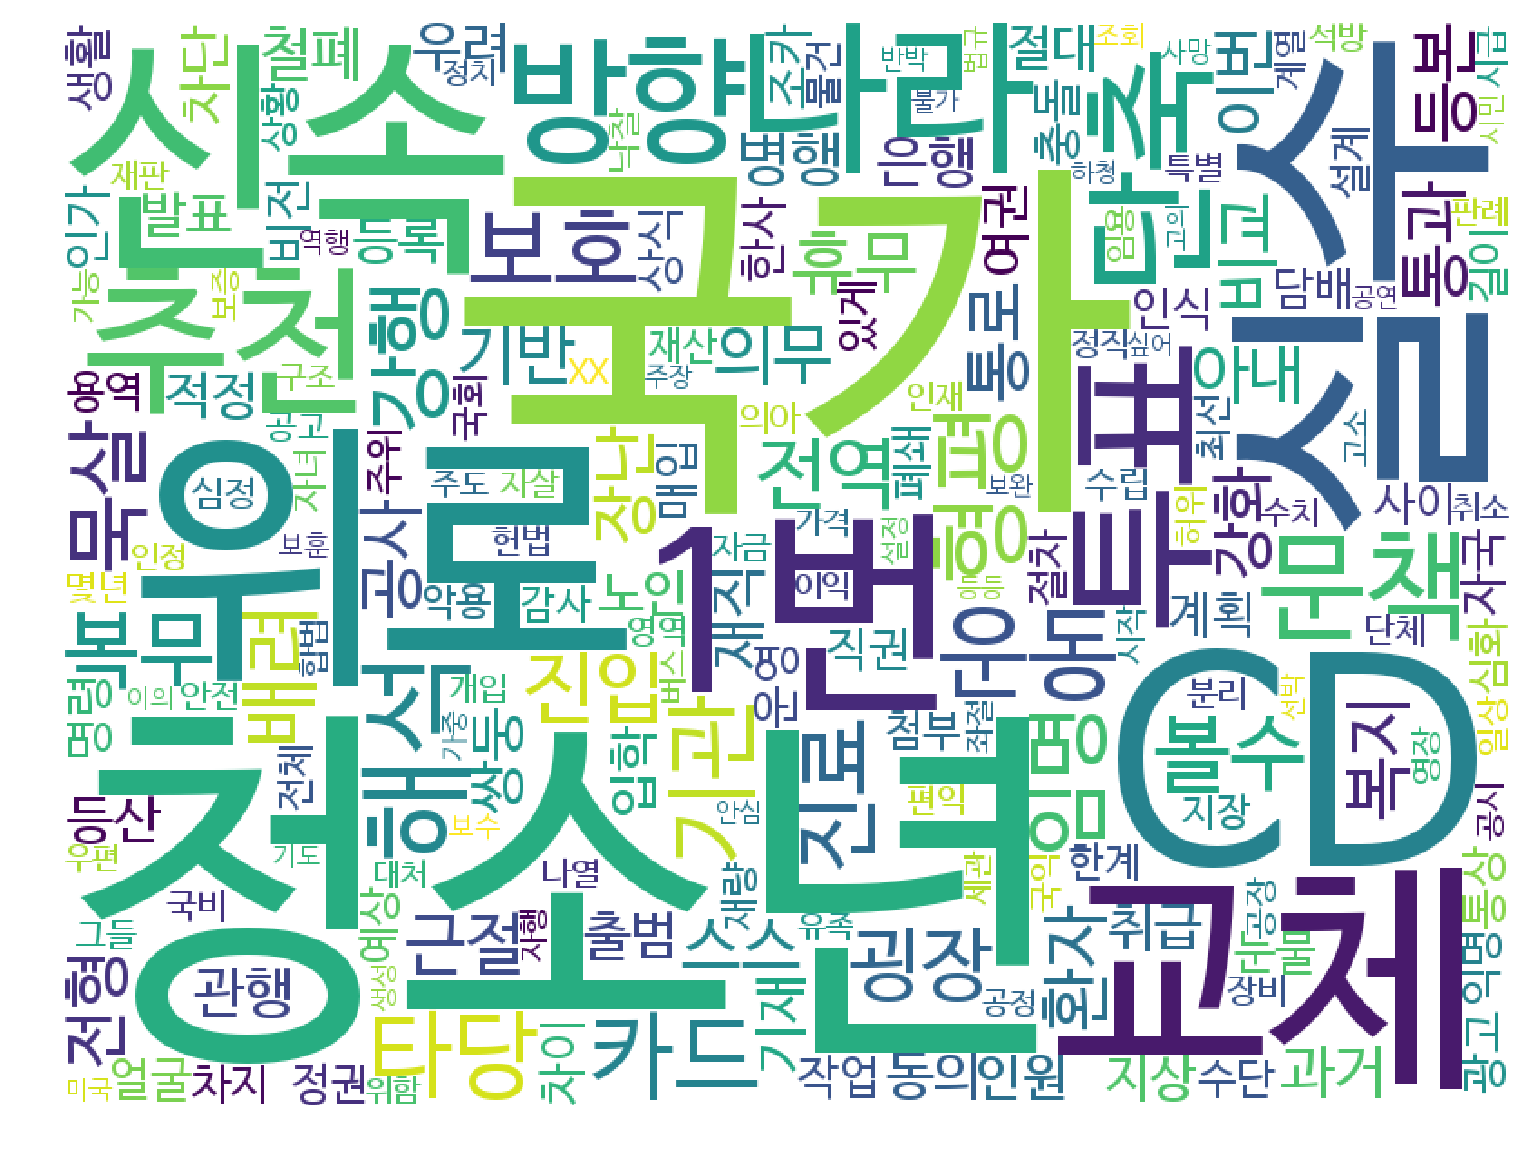

In [187]:
draw_wordcloud('행정')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (13574, 7485) tokens
building lr-graph completed

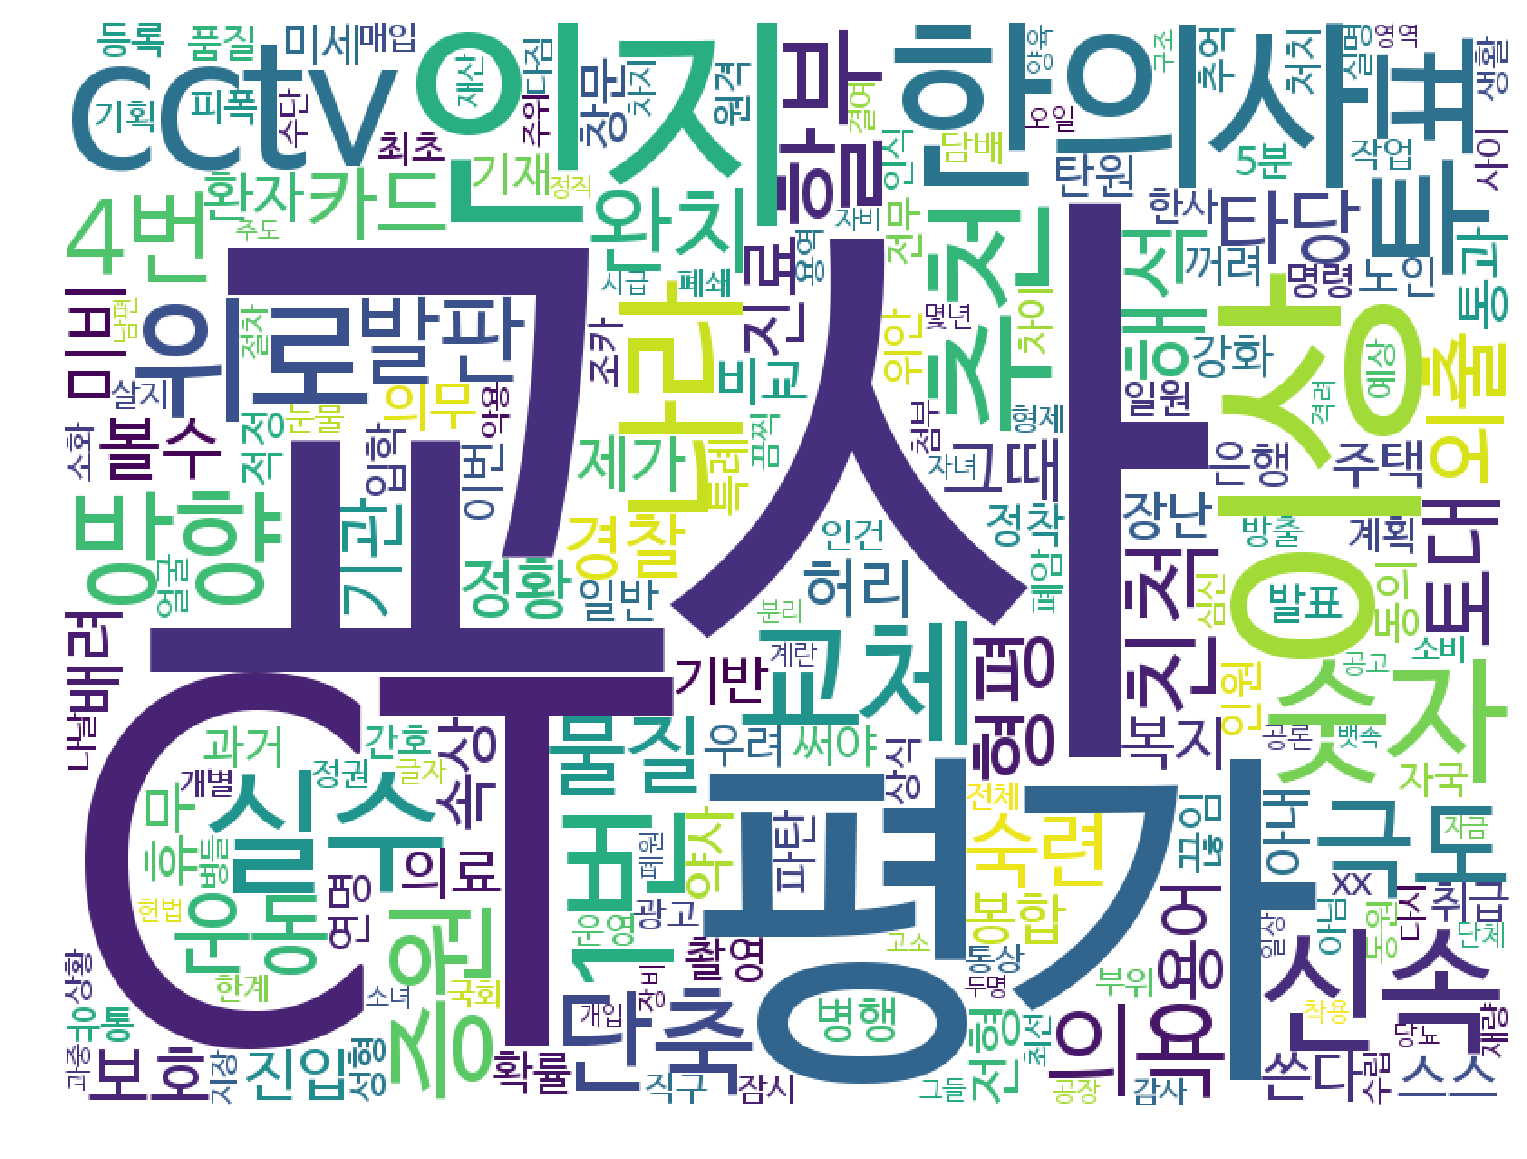

In [189]:
draw_wordcloud('보건복지')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (2442, 1366) tokens
building lr-graph completed

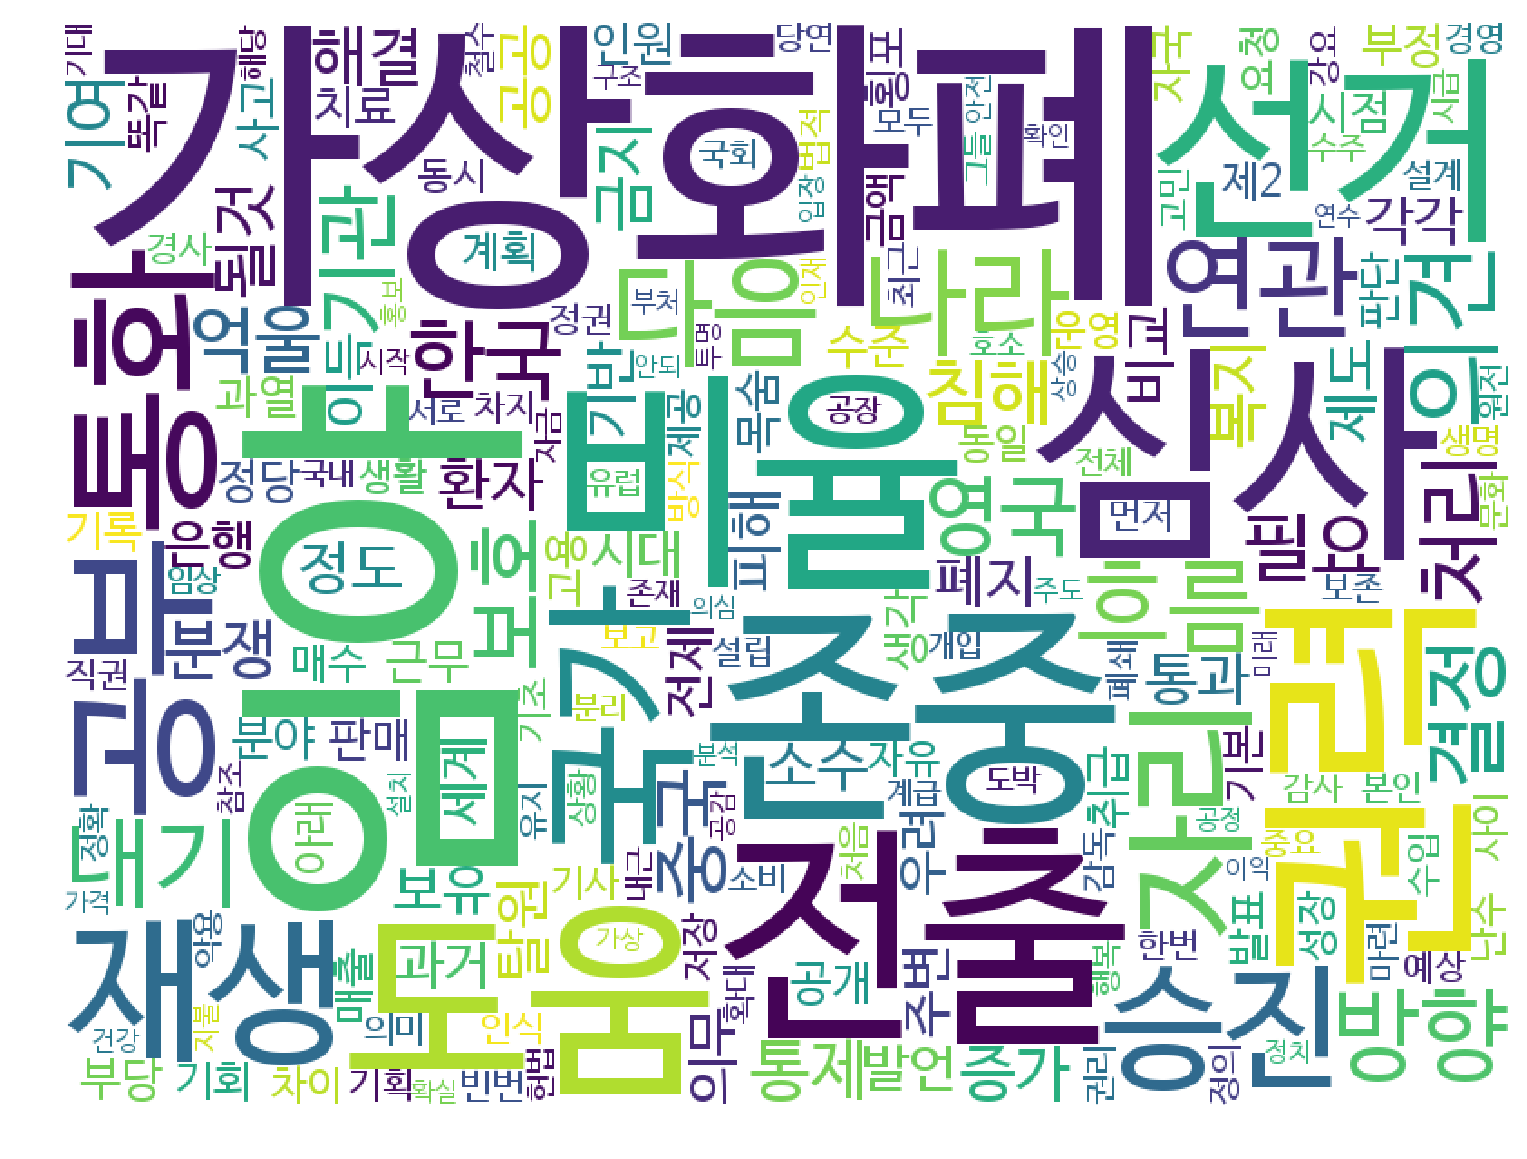

In [190]:
draw_wordcloud('성장동력')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (8839, 4875) tokens
building lr-graph completed

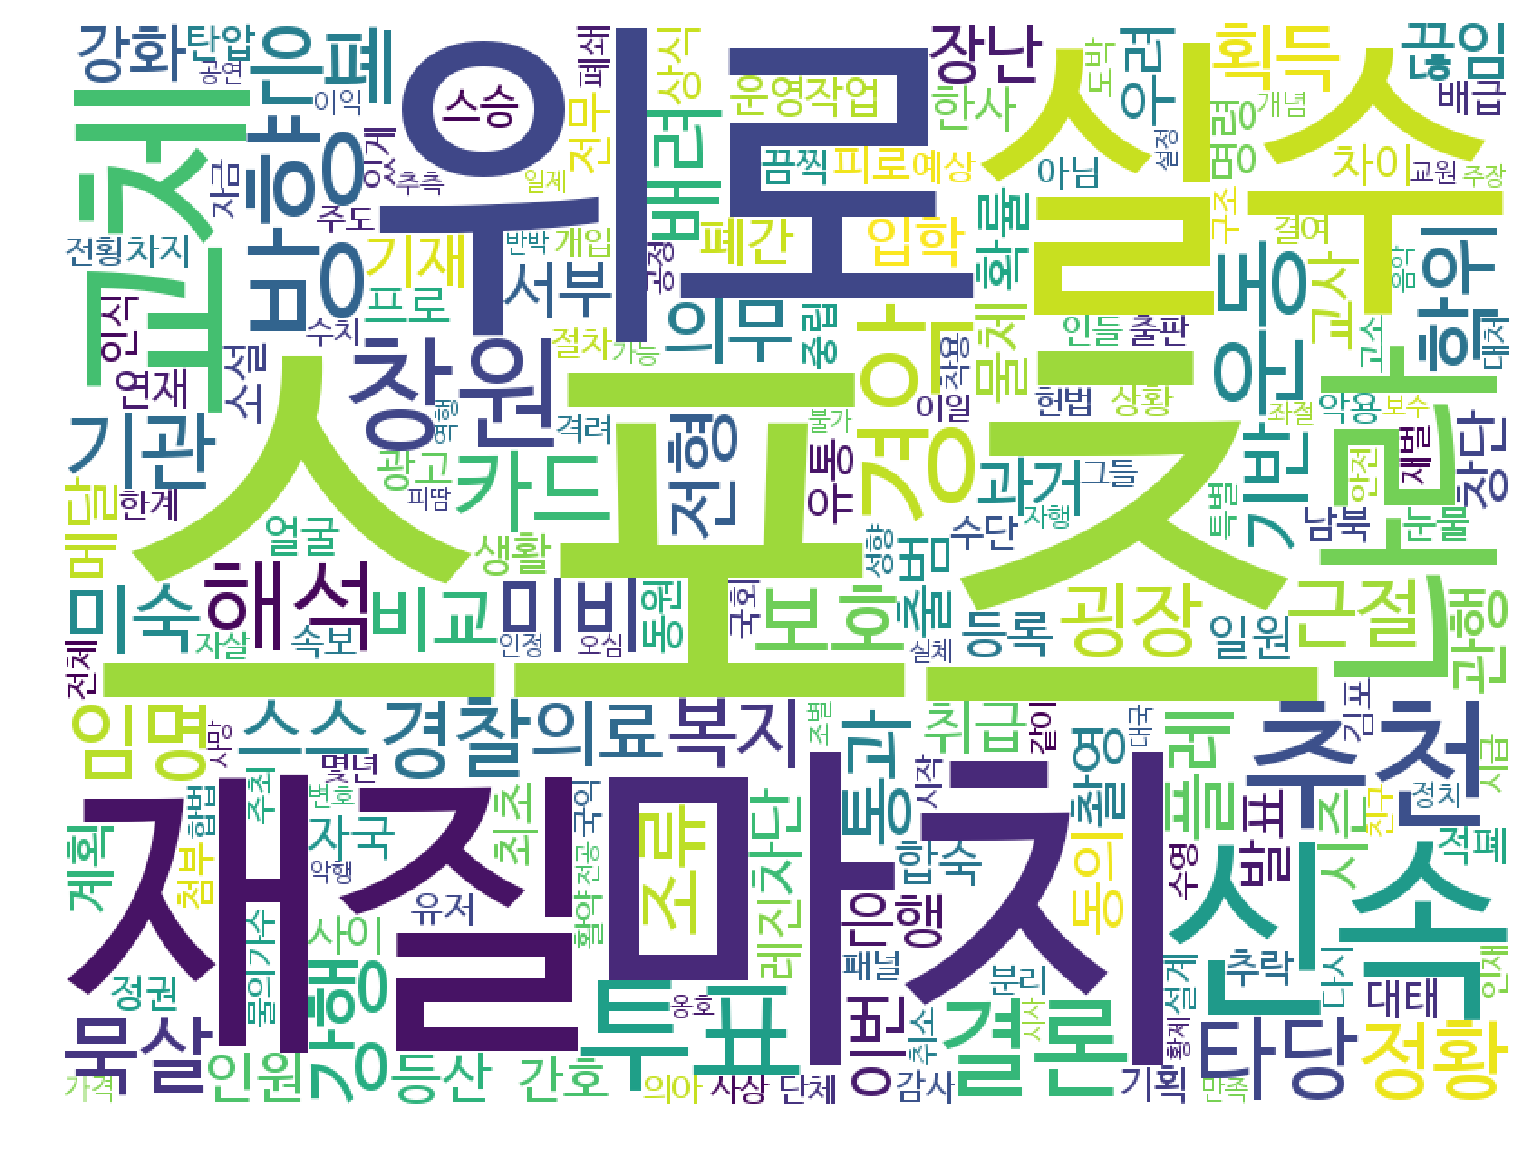

In [191]:
draw_wordcloud('문화/예술/체육/언론')

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (7537, 4288) tokens
building lr-graph completed

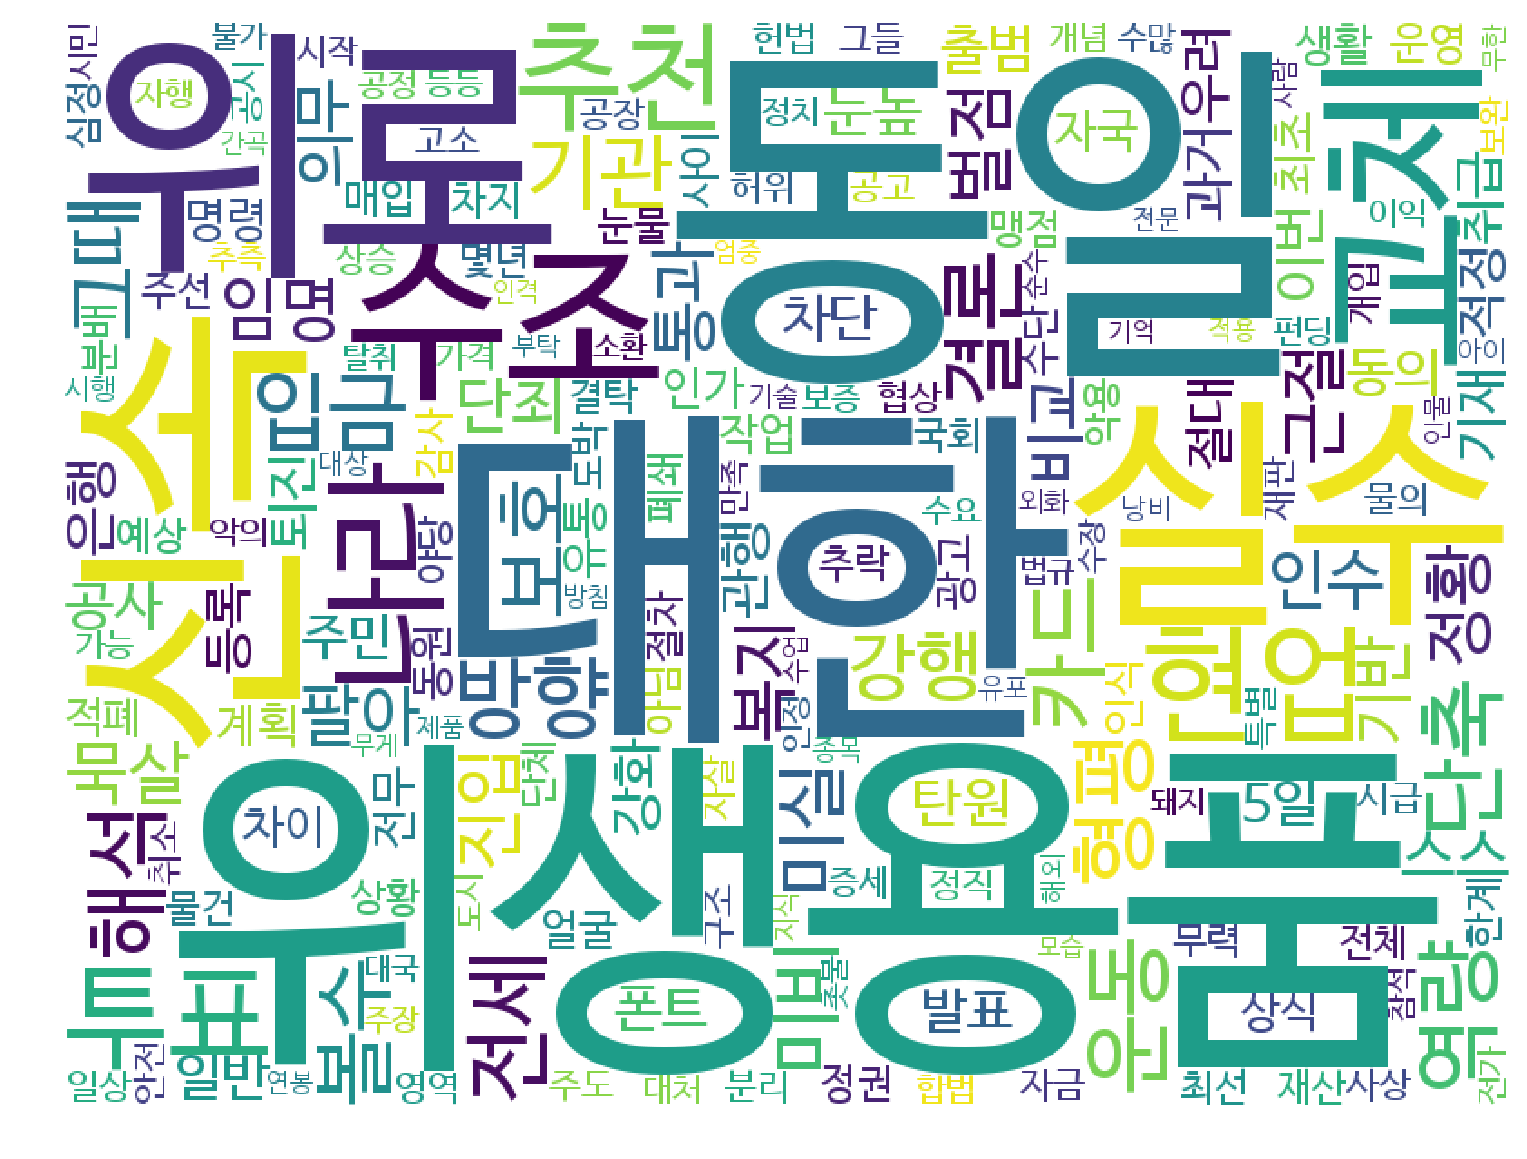

In [192]:
draw_wordcloud('경제민주화')

## 분류의 타당성 확인

### 3.1. 각 카테고리와 내용이 얼마나 연관성이 있는 지 확인해 봅니다.

### 3.2. 동일 카테고리 내 청원내용들 사이의 연관성을 확인해 봅니다.

<예상 결론>

따라서 정치개혁 분류는 > 어떻게 세분화하고

기타 분야에 무엇과 관련한 내용이 많이 나온것을 보아 새로운 카테고리를 만들고,

인권/성평등, 안전/환경, 육아/교육 분야에 겹치는 부분이 있기 때문에 모호성을 없애는 

분류를 새롭게 지정하는 편이 좋겠다.

또한 경제민주화 카테고리 또한 그 내용과 관련이 크게 없어 보이기에 모호성을 제거하여

새롭게 이름을 지정해 주었다.

---

| 기존 카테고리 |
| --------------- |
|정치개혁  |
|       기타          |
| 인권/성평등  |
| 안전/환경  |
|   육아/교육  |
| 외교/통일/국방 |
| 보건복지 |
| 문화/예술/체육/언론|
| 행정|
|  일자리  |
|  교통/건축/국토 |
|  미래  |
|  경제민주화  |
|  성장동력|
| 반려동물|
|저출산/고령화대책    |
|   농산어촌|

.


| 개편된 카테고리 |
| --------------- |
|   |
|   |
| |
|   |
| |
||
|  |
| |
| |
|  |
| |
|  |
| |
|   |
|   |
|   |
|   |

